In [1]:
import pandas as pd
drop_columns = ['CRASH_RECORD_ID', 'CRASH_DATE_EST_I',
                'NOT_RIGHT_OF_WAY_I', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I',
                'LANE_CNT', 'LOCATION', 
               ]
nrows = 100000 # for performance reasons we take samples
filepath_or_buffer='../input/chicago-car-crash-dataset/Traffic_Crashes_-_Crashes.csv'
df = pd.read_csv(filepath_or_buffer=filepath_or_buffer, 
                 nrows=nrows, 
                 parse_dates=['CRASH_DATE', 'DATE_POLICE_NOTIFIED'], 
                ).drop(columns=drop_columns)

df.sample(n=7)

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
37894,JC456641,2019-10-02 06:25:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,0.0,0.0,2.0,0.0,6,4,10,41.876839,-87.749491
81752,JE229295,2021-05-13 20:05:00,30,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,2.0,0.0,20,5,5,41.940241,-87.639639
29799,JG322559,2023-06-30 16:50:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,3.0,0.0,16,6,6,41.878287,-87.755137
2505,JC420161,2019-09-04 17:00:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,1.0,0.0,1.0,0.0,17,4,9,41.905253,-87.723813
97959,JC130329,2019-01-26 11:35:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,2.0,0.0,11,7,1,41.793582,-87.693734
37320,JB457896,2018-10-01 09:33:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,0.0,0.0,2.0,0.0,9,2,10,41.894115,-87.622880
65085,JA515802,2017-11-17 18:20:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,RAIN,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,OTHER,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,2.0,0.0,18,6,11,41.878684,-87.629473


In [2]:
df.shape

(100000, 38)

We have three quarters of a million rows so we need to be careful when plotting.

In [3]:
df.dtypes

RD_NO                                    object
CRASH_DATE                       datetime64[ns]
POSTED_SPEED_LIMIT                        int64
TRAFFIC_CONTROL_DEVICE                   object
DEVICE_CONDITION                         object
WEATHER_CONDITION                        object
LIGHTING_CONDITION                       object
FIRST_CRASH_TYPE                         object
TRAFFICWAY_TYPE                          object
ALIGNMENT                                object
ROADWAY_SURFACE_COND                     object
ROAD_DEFECT                              object
REPORT_TYPE                              object
CRASH_TYPE                               object
INTERSECTION_RELATED_I                   object
HIT_AND_RUN_I                            object
DAMAGE                                   object
DATE_POLICE_NOTIFIED             datetime64[ns]
PRIM_CONTRIBUTORY_CAUSE                  object
SEC_CONTRIBUTORY_CAUSE                   object
STREET_NO                               

In [4]:
df.isna().sum()

RD_NO                             1669
CRASH_DATE                           0
POSTED_SPEED_LIMIT                   0
TRAFFIC_CONTROL_DEVICE               0
DEVICE_CONDITION                     0
WEATHER_CONDITION                    0
LIGHTING_CONDITION                   0
FIRST_CRASH_TYPE                     0
TRAFFICWAY_TYPE                      0
ALIGNMENT                            0
ROADWAY_SURFACE_COND                 0
ROAD_DEFECT                          0
REPORT_TYPE                       4094
CRASH_TYPE                           0
INTERSECTION_RELATED_I           77100
HIT_AND_RUN_I                    68784
DAMAGE                               0
DATE_POLICE_NOTIFIED                 0
PRIM_CONTRIBUTORY_CAUSE              0
SEC_CONTRIBUTORY_CAUSE               0
STREET_NO                            0
STREET_DIRECTION                     1
STREET_NAME                          0
BEAT_OF_OCCURRENCE                   2
NUM_UNITS                            0
MOST_SEVERE_INJURY       

<Axes: ylabel='Frequency'>

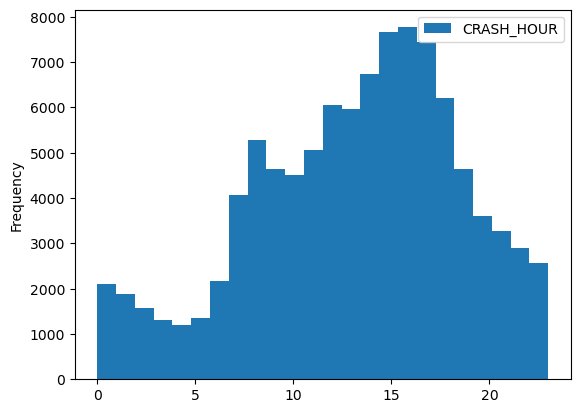

In [5]:
# crashes peak during rush hour
df[['CRASH_HOUR']].plot.hist(bins=24, legend=True)

<Axes: ylabel='Frequency'>

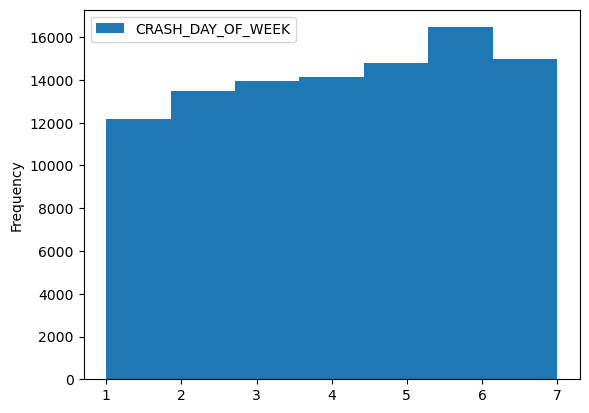

In [6]:
# going to guess 
df[['CRASH_DAY_OF_WEEK']].plot.hist(bins=7, legend=True)

<Axes: ylabel='Frequency'>

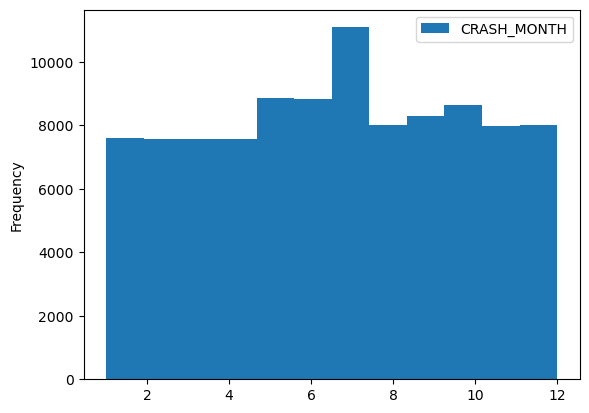

In [7]:
df[['CRASH_MONTH']].plot.hist(bins=12, legend=True)

<Axes: ylabel='INJURIES_TOTAL'>

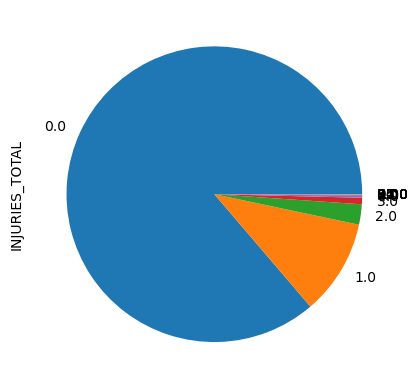

In [8]:
df['INJURIES_TOTAL'].value_counts().plot(kind='pie')

<Axes: ylabel='POSTED_SPEED_LIMIT'>

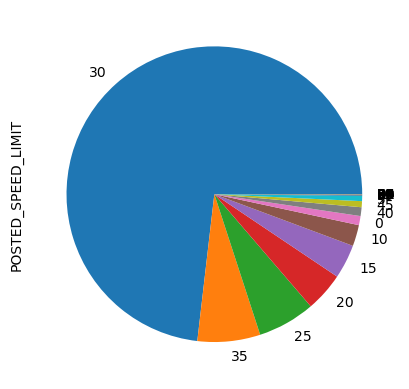

In [9]:
df['POSTED_SPEED_LIMIT'].value_counts().plot(kind='pie')

We have some outliers; are they sensible?

In [10]:
df[(df['POSTED_SPEED_LIMIT'] < 10) | (df['POSTED_SPEED_LIMIT'] > 55)]['POSTED_SPEED_LIMIT'].value_counts()

0     997
5     560
3      24
9      11
60      6
99      5
1       4
65      3
6       1
2       1
Name: POSTED_SPEED_LIMIT, dtype: int64

<Axes: ylabel='Frequency'>

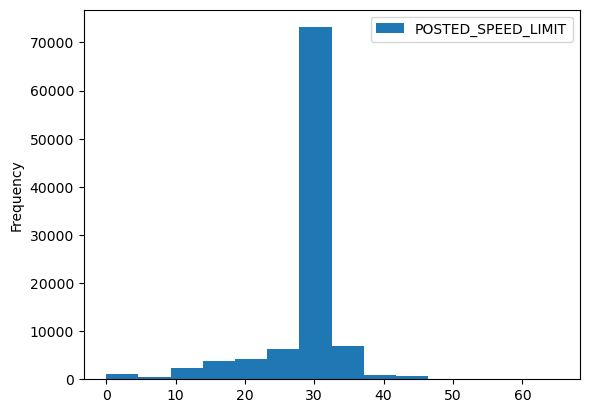

In [11]:
df[df['POSTED_SPEED_LIMIT'] < 66]['POSTED_SPEED_LIMIT'].plot.hist(bins=14, legend=True)

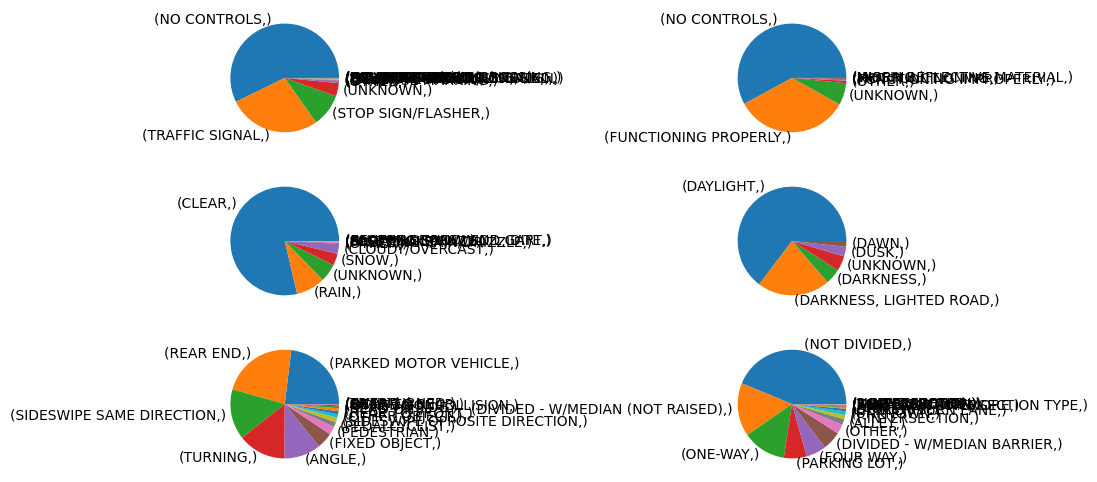

In [12]:
# let's make all of our ugly pie charts at once
from matplotlib.pyplot import subplots
pie_columns = [ 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE' , 'TRAFFICWAY_TYPE'	]

fig, ax = subplots(3, 2, figsize=(12, 6))
for index, axis in enumerate(ax.flatten()):
    df[[pie_columns[index]]].value_counts().plot(kind='pie', ax=axis, )

<Axes: >

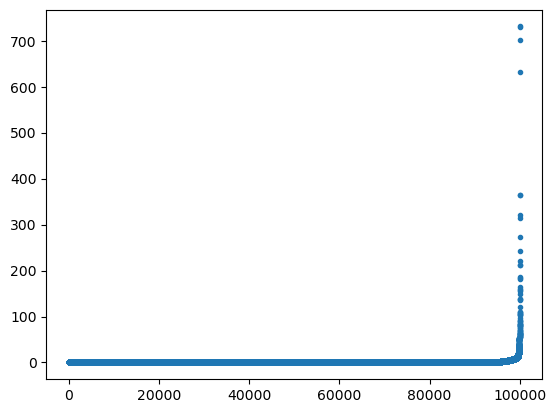

In [13]:
# most of the time the time between the crash and the time it is reported is negligible
df['delay'] = (df['DATE_POLICE_NOTIFIED'] - df['CRASH_DATE']).dt.days
df[['delay']].sort_values(by='delay').reset_index()['delay'].plot(kind='line', linestyle='none', marker='.')